Number of reference keypoints detected:  60
Number of align image keypoints detected:  60


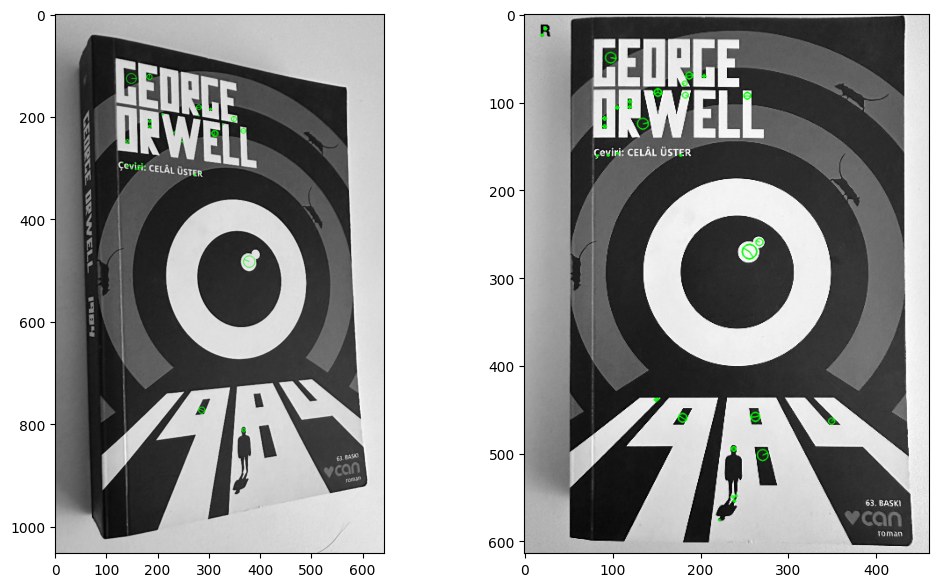

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgAlign = cv2.imread('./images/george6_resized.jpeg', cv2.IMREAD_GRAYSCALE)
imgReference = cv2.imread('./images/george1e_resized.jpeg', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create(60)

h, w = imgAlign.shape

alignKp, alignDes = sift.detectAndCompute(imgAlign, None)
referenceKp, referenceDes = sift.detectAndCompute(imgReference, None)

imgAlign = cv2.drawKeypoints(imgAlign, alignKp, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imgReference = cv2.drawKeypoints(imgReference, referenceKp, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print("Number of reference keypoints detected: ", len(referenceKp))
print("Number of align image keypoints detected: ", len(alignKp))

plt.figure(figsize=(12, 7))
plt.subplot(121)
plt.imshow(imgAlign)
plt.subplot(122)
plt.imshow(imgReference)


155.99359130859375
98.14275360107422
151.41664123535156
101.0
95.81231689453125
137.9891357421875
153.59361267089844
151.19192504882812
99.2118911743164
214.14013671875
99.52889251708984
90.74139404296875
195.67320251464844
116.61046600341797
214.5343780517578
190.4442138671875
230.154296875
154.5218505859375
156.92991638183594
Number of good matches:  19


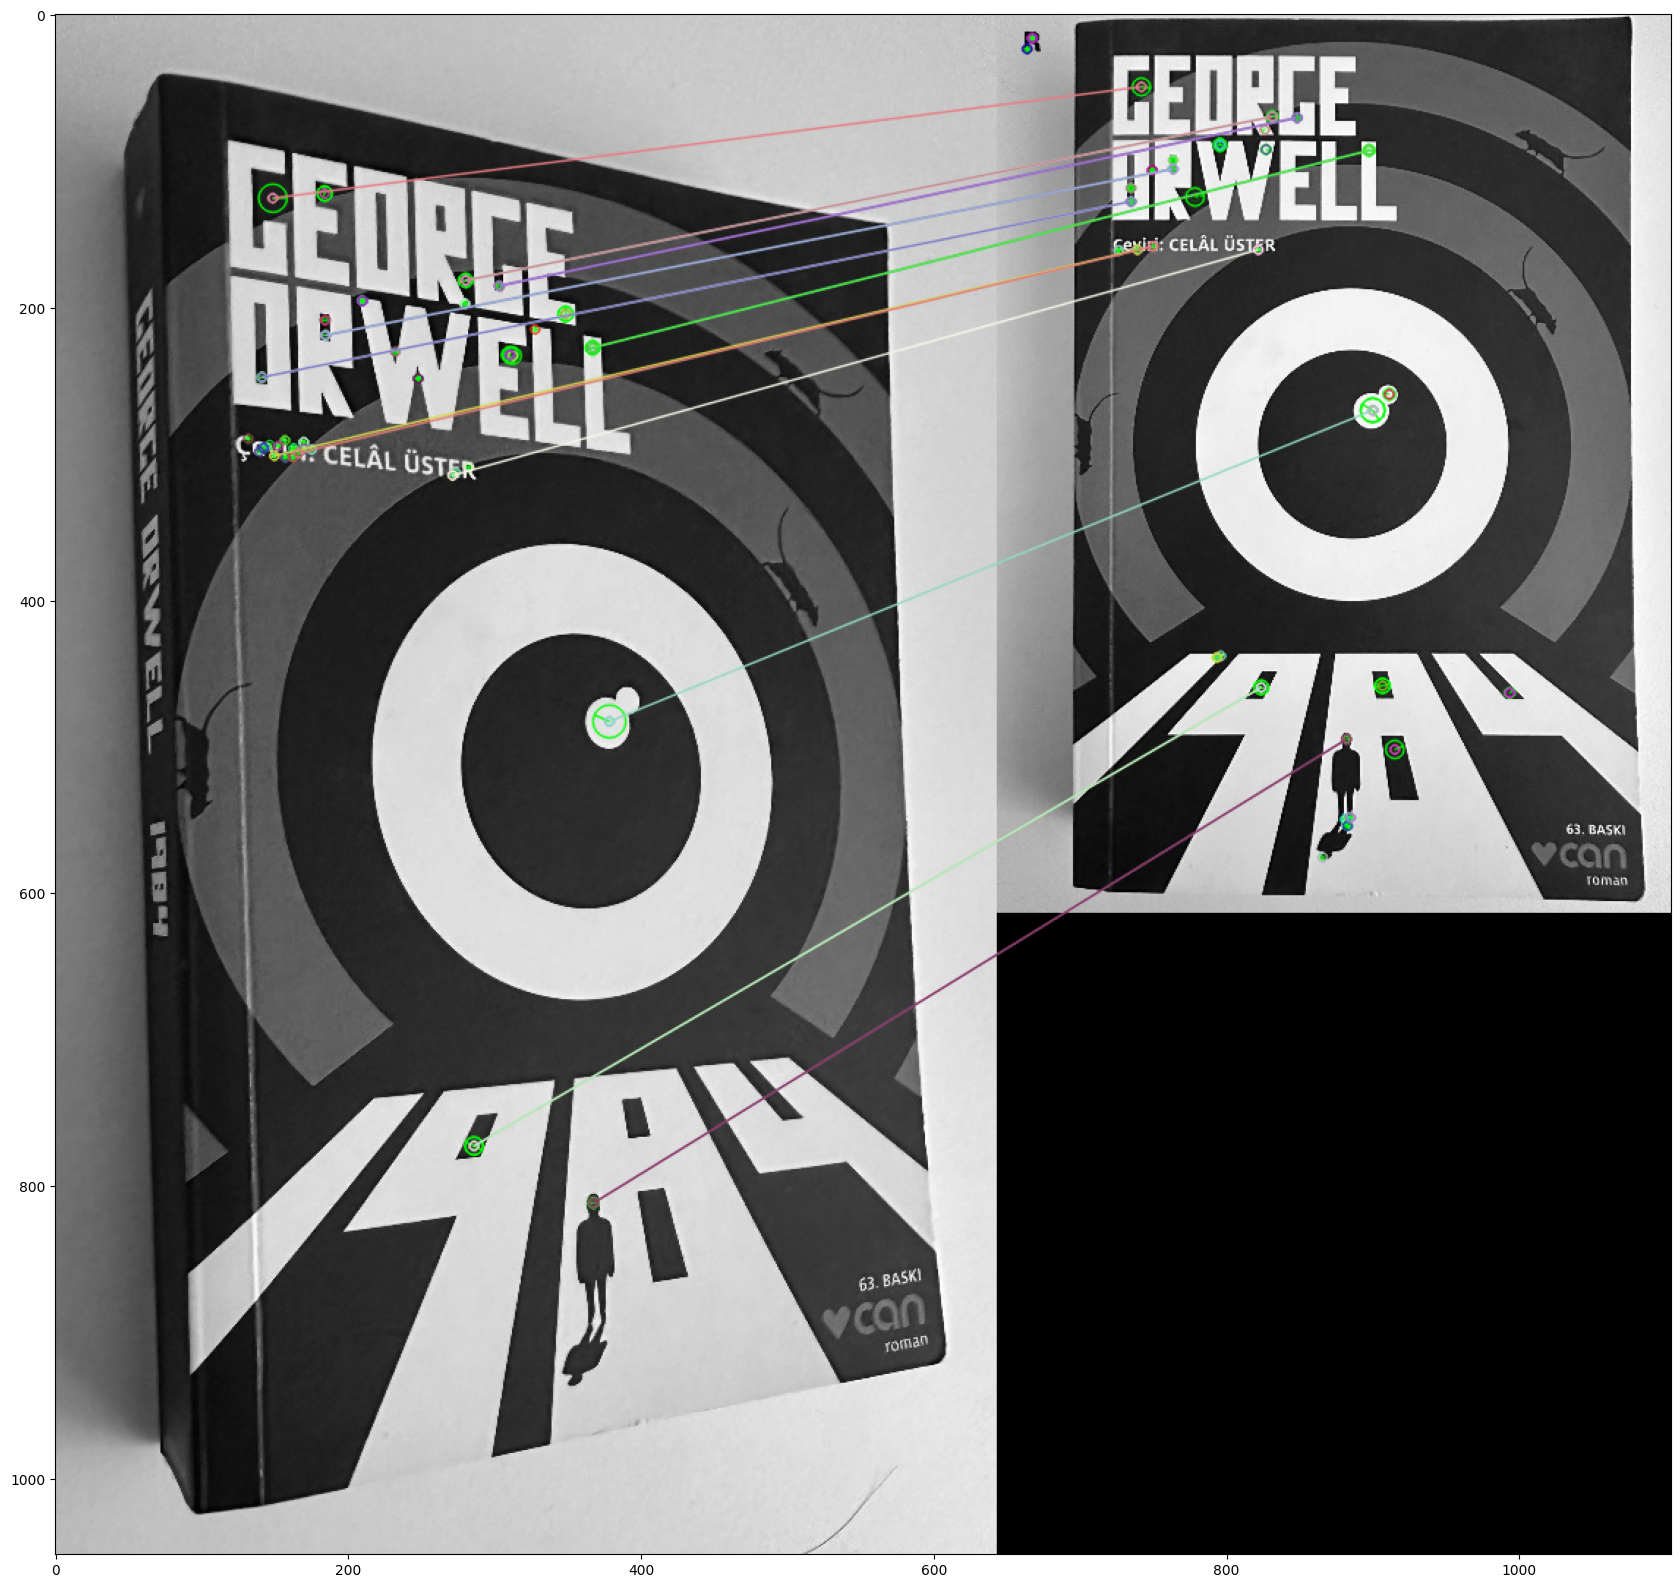

(<matplotlib.image.AxesImage at 0x7fb6a7589ab0>, None)

In [12]:
FLANN_INDEX_KDTREE = 1

index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
Matches = flann.knnMatch(alignDes, referenceDes, k=2)

good = []
for m, n in Matches:
    if m.distance < 0.7*n.distance:
        print(m.distance)
        good.append(m)

print("Number of good matches: ", len(good))
# print(f"{[match.distance for match in good]}")
src_pts = []
dst_pts = []

for match in good:
    src_pts.append(alignKp[match.queryIdx].pt)
    dst_pts.append(referenceKp[match.trainIdx].pt)

src_pts = np.float32(src_pts).reshape(-1, 1, 2)
dst_pts = np.float32(dst_pts).reshape(-1, 1, 2)

matchedImage = cv2.drawMatches(imgAlign, alignKp, imgReference, referenceKp, good, None)
plt.figure(figsize=(30, 20))
plt.imshow(matchedImage, 'gray'), plt.show()

Homografi matrisi: 
[[ 5.49816714e-01 -9.56249292e-03  1.10173372e+01]
 [-1.39680081e-01  5.95600787e-01 -7.79935214e+00]
 [-4.95040332e-04  4.95015706e-05  1.00000000e+00]]


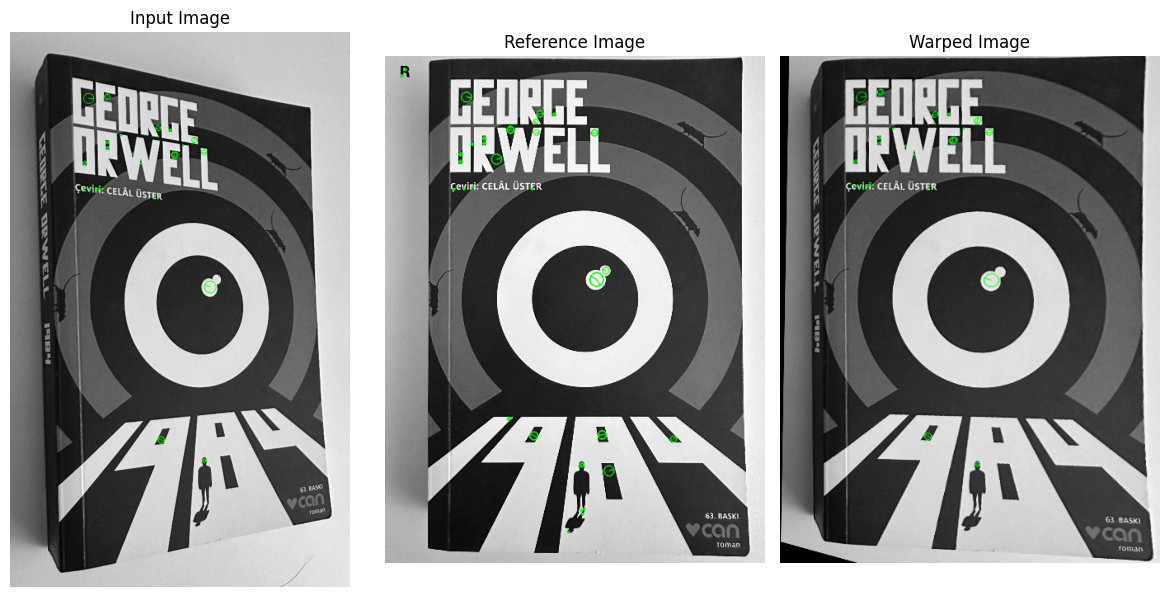

In [13]:
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

print(f"Homografi matrisi: \n{M}")

if M is not None:
    # pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    # dst = cv2.perspectiveTransform(pts, M)
    # imgReference = cv2.polylines(imgReference, [np.int32(dst)], True, 255, 3, cv2.LINE_AA)

    im1_reg = cv2.warpPerspective(imgAlign, M, (imgReference.shape[1], imgReference.shape[0]))

    plt.figure(figsize=(12, 6))
    plt.subplot(131), plt.imshow(imgAlign, cmap='gray')
    plt.title('Input Image'), plt.axis('off')

    plt.subplot(132), plt.imshow(imgReference, cmap='gray')
    plt.title('Reference Image'), plt.axis('off')

    plt.subplot(133), plt.imshow(im1_reg, cmap='gray')
    plt.title('Warped Image'), plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Homografi bulunamadı.")